In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('motorcycle-crash-data.csv', low_memory=False)

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Crash Record Number,County Code,County Name,Municipality Code,Municipality Name,District Code,District Name,Police Agency Code,Police Agency Name,Crash Year,...,Suspected Serious Injury,Suspected Minor Injury,Possible Injury,Motorcycle Drinking Driver,Drug Related,Illegal Drug Related,School Bus Unit,Drugged Driver,Impaired Driver,Geographic Location of the Crash
0,2016000348,9,Bucks,9218,Northampton Twp,6,District 6-0,09218,NORTHAMPTON TWP,2016,...,No,No,No,No,No,No,No,No,No,"(40.1764, -74.984)"
1,2016000697,9,Bucks,9224,Upper Makefield Twp,6,District 6-0,09224,UPPER MAKEFIELD TWP,2016,...,No,Yes,No,No,No,No,No,No,No,"(40.3114, -74.9505)"
2,2016001188,36,Lancaster,36408,Ephrata Boro,8,District 8-0,36408,EPHRATA,2016,...,No,Yes,Yes,No,No,No,No,No,No,"(40.1648, -76.2006)"
3,2016001239,64,Westmoreland,64215,Sewickley Twp,12,District 12-0,68A01,PSP - Greensburg,2016,...,Yes,No,No,No,No,No,No,No,No,"(40.2376, -79.7743)"
4,2016001947,23,Delaware,23208,Newtown Twp,6,District 6-0,23208,NEWTOWN TWP,2016,...,No,No,No,No,No,No,No,No,No,"(39.9846, -75.3991)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71670,2017038531,49,Northumberland,49201,Delaware Twp,3,District 3-0,68F06,PSP - Milton,2017,...,Yes,No,No,No,No,No,No,No,No,"(41.1572, -76.8731)"
71671,2017072506,25,Erie,25213,Millcreek Twp,1,District 1-0,25213,MILLCREEK TWP,2017,...,No,Yes,No,No,No,No,No,No,No,"(42.0997, -80.1458)"
71672,2017022897,49,Northumberland,49409,Snydertown Boro,3,District 3-0,68F08,PSP - Stonington,2017,...,No,No,No,No,No,No,No,No,No,"(40.8816, -76.6665)"
71673,2017092445,62,Washington,62228,Union Twp,12,District 12-0,62301,MONONGAHELA CITY,2017,...,Yes,Yes,No,No,Yes,No,No,Yes,Yes,"(40.231, -79.9727)"


In [4]:
df.columns

Index(['Crash Record Number', 'County Code', 'County Name',
       'Municipality Code', 'Municipality Name', 'District Code',
       'District Name', 'Police Agency Code', 'Police Agency Name',
       'Crash Year',
       ...
       'Suspected Serious Injury', 'Suspected Minor Injury', 'Possible Injury',
       'Motorcycle Drinking Driver', 'Drug Related', 'Illegal Drug Related',
       'School Bus Unit', 'Drugged Driver', 'Impaired Driver',
       'Geographic Location of the Crash'],
      dtype='object', length=180)

In [5]:
for column in df.columns:
    print(column)

Crash Record Number
County Code
County Name
Municipality Code
Municipality Name
District Code
District Name
Police Agency Code
Police Agency Name
Crash Year
Crash Month
Day of Week
Time of Day
Hour of Day
Illumination
Weather
Road Condition
Collision Type
Work Zone Type
Work Zone Location
Intersection Type
Traffic Control Device
Location Type
Urban / Rural
Fatality Count
Injury Count
Person Count
Total Unit Count
School Bus Indicator
School Zone Indicator
Latitude
Longitude
Arrival Time
Dispatch Time
Construction Zone Speed Limit
Estimated Hours Closed
Lane Closed
Lane Closure Direction
Notify Highway Maintenance
Special Jurisdiction
Traffic Control Device Function
Traffic Detour
Workers Present
Work Zone Close/Detour
Work Zone Flagger
Work Zone Law Officer
Work Zone Closure
Work Zone Moving
Work Zone Other
Work Zone Shoulder/Median
Vehicle Count
Automobile Count
Motorcycle Count
Bus Count
Small Truck Count
Heavy Truck Count
SUV Count
Van Count
Bicycle Count
Suspected Serious Injury Co

In [6]:
vehicle_type = df[['Automobile Count',
'Motorcycle Count',
'Bus Count',
'Small Truck Count',
'Heavy Truck Count',
'SUV Count',
'Van Count',
'Bicycle Count']]

In [7]:
vehicle_type.rename(columns={'Motorcycle Count': 'Other Motorcycle'}, inplace=True)
vehicle_type

/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Automobile Count,Other Motorcycle,Bus Count,Small Truck Count,Heavy Truck Count,SUV Count,Van Count,Bicycle Count
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
71670,0,1,0,0,0,0,0,0
71671,0,1,0,0,0,0,0,0
71672,0,1,0,0,0,0,0,0
71673,0,1,0,2,0,0,0,0


In [8]:
columns = vehicle_type.columns.tolist()
for i in columns:
    if i == 'Other Motorcycle':
        vehicle_type[i] = vehicle_type[i].apply(lambda x: 1 if x > 1 else 0)
    else:
        vehicle_type[i] = vehicle_type[i].apply(lambda x: 1 if x > 0 else 0)

/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
vehicle_type

,Automobile Count,Other Motorcycle,Bus Count,Small Truck Count,Heavy Truck Count,SUV Count,Van Count,Bicycle Count
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
71670,0,0,0,0,0,0,0,0
71671,0,0,0,0,0,0,0,0
71672,0,0,0,0,0,0,0,0
71673,0,0,0,1,0,0,0,0


In [10]:
vehicle_type['Single Vehicle'] = vehicle_type.sum(axis=1).apply(lambda x: 1 if x < 1 else 0)

/home/michaelpfredericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
vehicle_type

,Automobile Count,Other Motorcycle,Bus Count,Small Truck Count,Heavy Truck Count,SUV Count,Van Count,Bicycle Count,Single Vehicle
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
71670,0,0,0,0,0,0,0,0,1
71671,0,0,0,0,0,0,0,0,1
71672,0,0,0,0,0,0,0,0,1
71673,0,0,0,1,0,0,0,0,0


In [12]:
columns.append('Single Vehicle')
vcount_dict = {}
for i in columns:
    vcount_dict[i] = vehicle_type[i].sum()
vcount = pd.DataFrame.from_dict(vcount_dict, orient='index', columns=['Vcount'])
vcount

,Vcount
Automobile Count,22359
Other Motorcycle,1676
Bus Count,172
Small Truck Count,4527
Heavy Truck Count,898
SUV Count,4945
Van Count,2227
Bicycle Count,265
Single Vehicle,36389


In [13]:
motocr_count = df['Crash Record Number'].count()

In [14]:
motocr_count

71675

In [15]:
vcount['%Total'] = vcount['Vcount'].apply(lambda x: x/motocr_count)

In [16]:
vcount['Type'] = vcount.index
vcount['Type'] = vcount['Type'].apply(lambda x : x.split()[0])

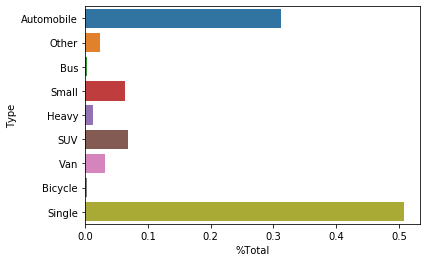

In [17]:
sns.barplot(x='%Total', y='Type', data=vcount)

In [20]:
vcount['%Total'].sum()

1.024876177188699